### Problem Statement
I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:
Box plots
Scatter plots
Regression Model

### Dodgers Major League Baseball data from 2012

In [2]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Load the data into a dataframe and then convert the columns that are categorical
dodgers_df = pd.read_csv("/home/arindam/Documents/mygithub/bu_dsc/data/processed/dodgers.csv", 
dtype = {'month': 'category', 'day':'category',                                                                    'day_of_week': 'category','skies': 'category','day_night':'category','cap':'category','shirt':'category','fireworks':'category','bobblehead':'category'})

In [5]:
# Display the info and the shape of the dataframe
dodgers_df.info()
print('The dimension of the dataframe is ', dodgers_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   month        81 non-null     category
 1   day          81 non-null     category
 2   attend       81 non-null     int64   
 3   day_of_week  81 non-null     category
 4   opponent     81 non-null     object  
 5   temp         81 non-null     int64   
 6   skies        81 non-null     category
 7   day_night    81 non-null     category
 8   cap          81 non-null     category
 9   shirt        81 non-null     category
 10  fireworks    81 non-null     category
 11  bobblehead   81 non-null     category
dtypes: category(9), int64(2), object(1)
memory usage: 4.8+ KB
The dimension of the dataframe is  (81, 12)


In [6]:
# SHow the data (first 10 rows)
# Print the first 10 lines only
print(dodgers_df.head(10))

  month day  attend day_of_week   opponent  temp   skies day_night cap shirt fireworks bobblehead
0   APR  10   56000     Tuesday    Pirates    67  Clear        Day  NO    NO        NO         NO
1   APR  11   29729   Wednesday    Pirates    58  Cloudy     Night  NO    NO        NO         NO
2   APR  12   28328    Thursday    Pirates    57  Cloudy     Night  NO    NO        NO         NO
3   APR  13   31601      Friday     Padres    54  Cloudy     Night  NO    NO       YES         NO
4   APR  14   46549    Saturday     Padres    57  Cloudy     Night  NO    NO        NO         NO
5   APR  15   38359      Sunday     Padres    65  Clear        Day  NO    NO        NO         NO
6   APR  23   26376      Monday     Braves    60  Cloudy     Night  NO    NO        NO         NO
7   APR  24   44014     Tuesday     Braves    63  Cloudy     Night  NO    NO        NO         NO
8   APR  25   26345   Wednesday     Braves    64  Cloudy     Night  NO    NO        NO         NO
9   APR  27   44807 

In [7]:
# Describing the data to show thedifferent numeric and categorical variables
print("Describe Data") 
print(dodgers_df.describe()) 
print("Summarized Data") 
print(dodgers_df.describe(include='O'))

Describe Data
             attend       temp
count     81.000000  81.000000
mean   41040.074074  73.148148
std     8297.539460   8.317318
min    24312.000000  54.000000
25%    34493.000000  67.000000
50%    40284.000000  73.000000
75%    46588.000000  79.000000
max    56000.000000  95.000000
Summarized Data
       opponent
count        81
unique       17
top      Giants
freq          9


In [8]:
# This shows that there were 15 Day matches and 66 night matches out of the total 81 matches
dodgers_df.groupby('day_night')['attend'].count()

day_night
Day      15
Night    66
Name: attend, dtype: int64

In [9]:
# filtering the dataframe in order to view the data only for the nights
# The below dataframe shows attendance of spectators for nights only
data_nite = dodgers_df.loc[dodgers_df['day_night'] == 'Night']

In [10]:
# The new dataframe has all 12 columns and 66 rows for the night matches
data_nite.shape

(66, 12)

In [11]:
# This representation of the data is similar to the pivot option done below
# This is just another way to show that the pivot is calculating right

data_nite.groupby(['month','day_of_week'])['attend'].sum()

month  day_of_week
APR    Friday          76408
       Monday          26376
       Saturday       100791
       Sunday              0
       Thursday        28328
       Tuesday         44014
       Wednesday       56074
AUG    Friday         120964
       Monday          69537
       Saturday        86872
       Sunday              0
       Thursday        54621
       Tuesday        111024
       Wednesday       77257
JUL    Friday          43873
       Monday          99911
       Saturday        54014
       Sunday          55359
       Thursday            0
       Tuesday        140214
       Wednesday       53570
JUN    Friday          90195
       Monday          50559
       Saturday        45210
       Sunday              0
       Thursday        49006
       Tuesday         55279
       Wednesday       43494
MAY    Friday         112780
       Monday         106041
       Saturday       109679
       Sunday          44005
       Thursday        26773
       Tuesday        13

In [12]:
# The below dataframe shows attendance of spectators for Mondays of May only
# This filtering was done to visualize the data
data_nite.loc[(data_nite['month'] == 'APR'),['day_of_week','attend']]

,day_of_week,attend
1,Wednesday,29729
2,Thursday,28328
3,Friday,31601
4,Saturday,46549
6,Monday,26376
7,Tuesday,44014
8,Wednesday,26345
9,Friday,44807
10,Saturday,54242


In [13]:
# Pivot data by month and day of the week
# Total for the whole period is shown in the end
attend_day = pd.pivot_table(data_nite, index=['month','day_of_week'],values=["attend"],aggfunc=[np.sum,len,np.mean],fill_value=0,margins=True, margins_name='Total')
attend_day

sum    len          mean
                    attend attend        attend
month day_of_week                              
APR   Friday         76408    2.0  38204.000000
      Monday         26376    1.0  26376.000000
      Saturday      100791    2.0  50395.500000
      Sunday             0    NaN           NaN
      Thursday       28328    1.0  28328.000000
      Tuesday        44014    1.0  44014.000000
      Wednesday      56074    2.0  28037.000000
AUG   Friday        120964    3.0  40321.333333
      Monday         69537    2.0  34768.500000
      Saturday       86872    2.0  43436.000000
      Sunday             0    NaN           NaN
      Thursday       54621    1.0  54621.000000
      Tuesday       111024    2.0  55512.000000
      Wednesday      77257    2.0  38628.500000
JUL   Friday         43873    1.0  43873.000000
      Monday         99911    3.0  33303.666667
      Saturday       54014    1.0  54014.000000
      Sunday         55359    1.0  55359.000000
      Thursday           0    NaN           NaN
      Tuesday       140214    3.0  46738.000000
      Wednesday      53570    1.0  53570.000000
JUN   Friday         90195    2.0  45097.500000
      Monday         50559    1.0  50559.000000
      Saturday       45210    1.0  45210.000000
      Sunday             0    NaN           NaN
      Thursday       49006    1.0  49006.000000
      Tuesday        55279    1.0  55279.000000
      Wednesday      43494    1.0  43494.000000
MAY   Friday        112780    3.0  37593.333333
      Monday        106041    3.0  35347.000000
      Saturday      109679    3.0  36559.666667
      Sunday         44005    1.0  44005.000000
      Thursday       26773    1.0  26773.000000
      Tuesday       131013    3.0  43671.000000
      Wednesday      59502    2.0  29751.000000
OCT   Friday             0    NaN           NaN
      Monday         33624    1.0  33624.000000
      Saturday           0    NaN           NaN
      Sunday             0    NaN           NaN
      Thursday           0    NaN           NaN
      Tuesday        42473    1.0  42473.000000
      Wednesday      34014    1.0  34014.000000
SEP   Friday         77300    2.0  38650.000000
      Monday         33540    1.0  33540.000000
      Saturday      119165    3.0  39721.666667
      Sunday             0    NaN           NaN
      Thursday       43309    1.0  43309.000000
      Tuesday        40619    1.0  40619.000000
      Wednesday      50560    1.0  50560.000000
Total              2697347   66.0  40868.893939

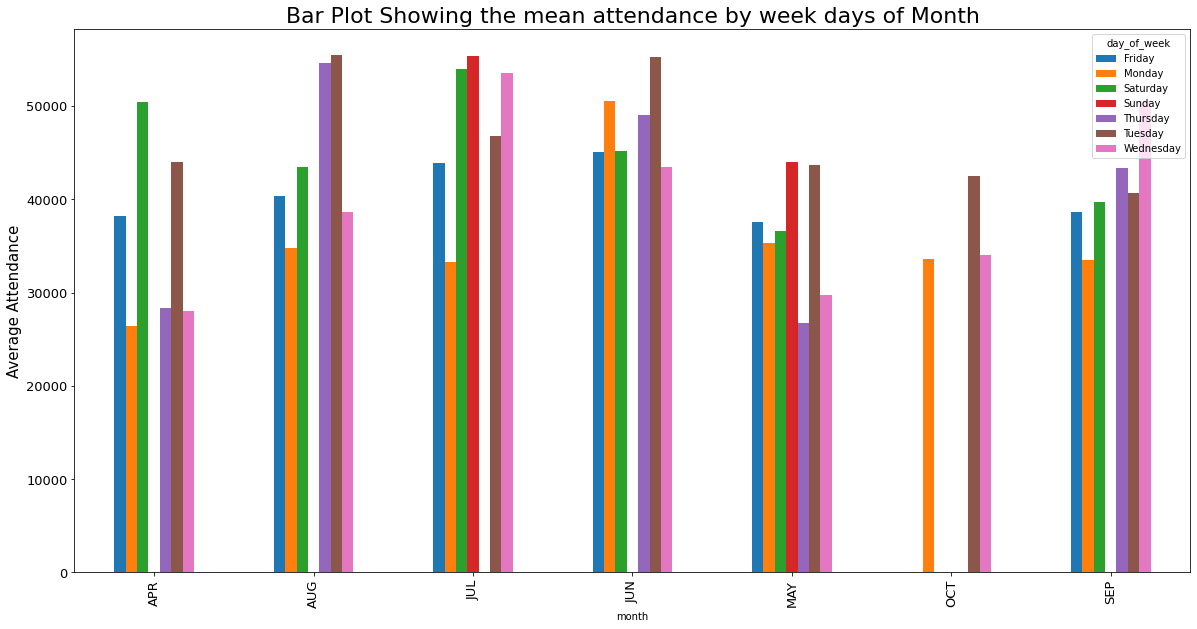

In [14]:
# The below dataframe shows attendance of spectators for all days of the week for all the months
# I am showing the mean attendance as all week days are not same for the month so taking the sum is not a good idea

# My obseravtion on the data looks like there are no clear days that could be universally having the maximum attendance

# Taking a subset of the data for visualization
month_day = data_nite[['month','day_of_week','attend']]

month_day_pivot = pd.pivot_table(
    month_day,
    values="attend",
    index = "month",
    columns="day_of_week",
    aggfunc = np.mean   
    )


ax = month_day_pivot.plot(kind='bar', figsize=(20,10), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Bar Plot Showing the mean attendance by week days of Month", fontsize=22)
ax.set_ylabel("Average Attendance", fontsize=15);
plt.show()

In [15]:
# Showing the data for April only
attend_day.query('month == ["APR"]')

sum    len     mean
                   attend attend   attend
month day_of_week                        
APR   Friday        76408    2.0  38204.0
      Monday        26376    1.0  26376.0
      Saturday     100791    2.0  50395.5
      Sunday            0    NaN      NaN
      Thursday      28328    1.0  28328.0
      Tuesday       44014    1.0  44014.0
      Wednesday     56074    2.0  28037.0

In [16]:
# Pivot data by day of the week
# Total for the whole period is shown in the end

# This shows that on average Tuesday has the most attendance as there are only 2 sundays and Monday the least

attend_day_of_week = pd.pivot_table(data_nite, index=['day_of_week'],values=["attend"],aggfunc=[np.sum,len,np.mean],fill_value=0,margins=True, margins_name='Total')
attend_day_of_week

,sum,len,mean
,attend,attend,attend
day_of_week,,,
Friday,521520,13,40116.923077
Monday,419588,12,34965.666667
Saturday,515731,12,42977.583333
Sunday,99364,2,49682.000000
Thursday,202037,5,40407.400000
Tuesday,564636,12,47053.000000
Wednesday,374471,10,37447.100000
Total,2697347,66,40868.893939


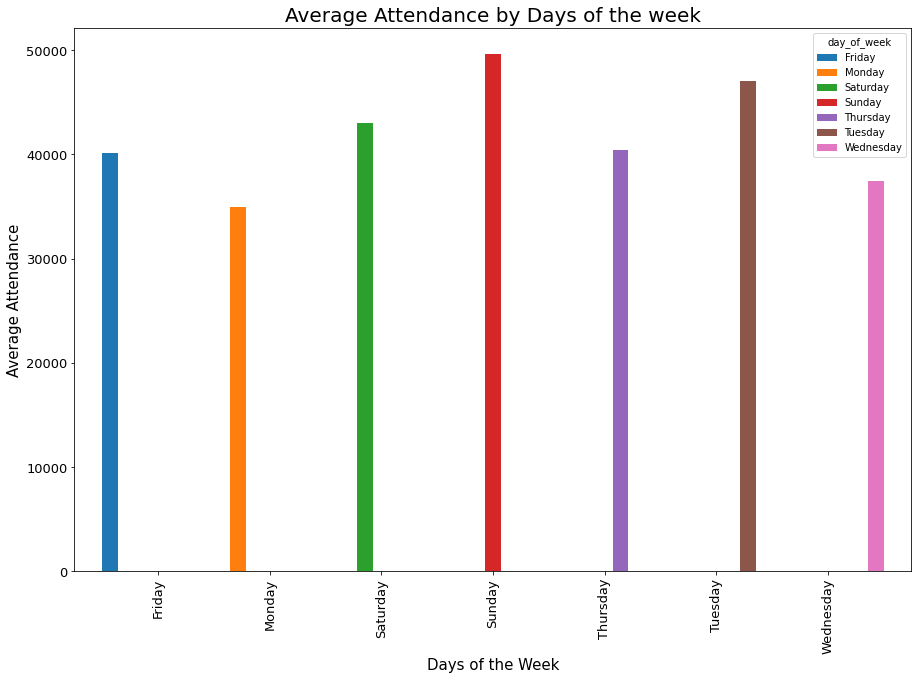

In [17]:
# The below dataframe shows attendance of spectators for Mondays of May only
# Observation: If we go by only the days of the week then Tuesday has the highest attendance by average with with saturday being the next

width = 1
day = data_nite[['day_of_week','attend']]

day_pivot = pd.pivot_table(
    day,
    values="attend",
    index = "day_of_week",
    columns="day_of_week",
    aggfunc=np.mean
    )

ax = day_pivot.plot(kind='bar', width = width, figsize=(15,10), fontsize=13);

ax.set_title("Average Attendance by Days of the week", fontsize=20)
ax.set_ylabel("Average Attendance", fontsize=15)
ax.set_xlabel("Days of the Week", fontsize=15)
plt.show()

In [18]:
# The below dataframe shows attendance of spectators for Mondays of May only
dodgers_df.loc[(dodgers_df['day_of_week'] == 'Monday') & (dodgers_df['month'] == 'MAY'),['month','day_of_week','attend']]

,month,day_of_week,attend
12,MAY,Monday,43713
18,MAY,Monday,24312
26,MAY,Monday,38016


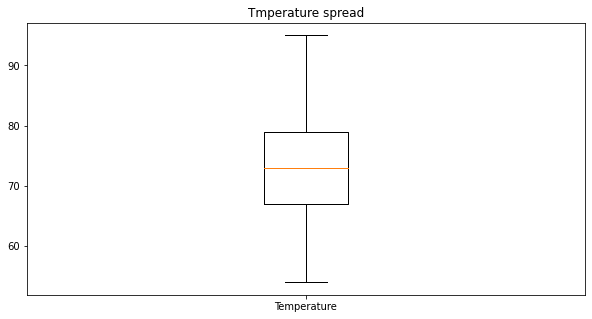

In [19]:
# Box plot of the attendance of spectators
# Understand the spread of the data
# Spot outliers: Did not find any outliers
# compare different distributions: did not do this opertion

plt.figure(figsize=(10,5))
# Set plot title
plt.title('Tmperature spread')

dataset = [dodgers_df.temp]
plt.boxplot(dataset, labels=['Temperature'])

plt.show()

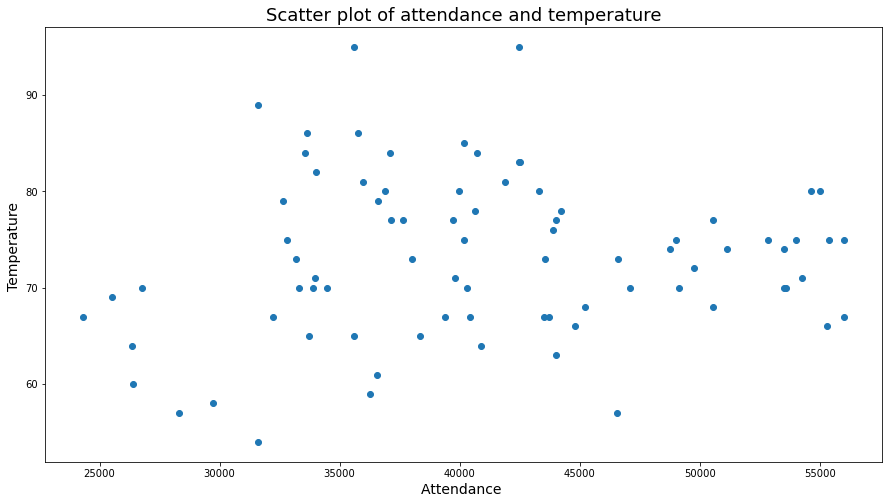

In [20]:
plt.figure(figsize=(15, 8))
# plot two values attendance temperature
plt.scatter(dodgers_df.attend, dodgers_df.temp)
plt.xlabel("Attendance ", fontsize=14)
plt.ylabel("Temperature ", fontsize=14)
plt.title("Scatter plot of attendance and temperature",fontsize=18)
plt.show()

In [21]:
# Now making a multiple regression linear model with more than one independent variable
# We are trying to predict the attendance on a particular day to run some kind of promotion
# 
print('Size of the dataset', data_nite.shape)
print('sample of first 5 rows')
print(data_nite.head(5))

Size of the dataset (66, 12)
sample of first 5 rows
  month day  attend day_of_week opponent  temp   skies day_night cap shirt fireworks bobblehead
1   APR  11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO        NO         NO
2   APR  12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO        NO         NO
3   APR  13   31601      Friday   Padres    54  Cloudy     Night  NO    NO       YES         NO
4   APR  14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO        NO         NO
6   APR  23   26376      Monday   Braves    60  Cloudy     Night  NO    NO        NO         NO


In [22]:
# From sklearn module we will use the LinearRegression() method to create a linear regression model
# Defining the independent variable as X
# Defining the dependent variable as y
# For the model, we use a simple linear regression and then make the pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
# Creating the features from the data set

X = data_nite[['day_of_week','opponent','temp']]
y = data_nite['attend']
# Make test and training split (20:80)

X_train,X_test,y_train, y_test = train_test_split(X,y, random_state=1000, test_size = 0.2)

print('Features-Training Set: ',len(X_train))
print('Features-Test Set: ',len(X_test))

# Transforming the columns to numeric values
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                        ['day_of_week', 'opponent']),
                                        remainder='passthrough')

# Running the regression classifier
regr = LinearRegression()
# Running the pipeline
pipe = make_pipeline(column_trans,regr)

Features-Training Set:  52
Features-Test Set:  14


In [23]:
# Run the cross validation 10 times using the negative mean absolute error as our scoring function. 
# Finally, take the average of the 10 values to see the magnitude of the error
cross_val_score(pipe, X_train, y_train, cv=10, scoring='neg_mean_absolute_error').mean().round(2)

-7160.51

In [29]:

# Fitting the pipeline with the training set
pipe.fit(X_train,y_train)


# Performance of Regression Classifier
# Using the Test Set
# Predicting the test set
predicted = pipe.predict(X_test)

In [30]:
predicted

array([61710.61937881, 47513.55135392, 34287.76965037, 29583.51396288,
       42439.37794634, 40454.96339422, 47742.04938423, 34075.28068369,
       48771.8543141 , 33195.73089545, 45369.02543498, 45917.12934732,
       37961.12229934, 45838.5823268 ])

In [31]:
# Showing the data for the 10th row onwards without the attendance
X_test

,day_of_week,opponent,temp
41,Tuesday,Reds,70
37,Friday,Mets,72
23,Friday,Astros,59
12,Monday,Giants,67
27,Tuesday,Brewers,74
4,Saturday,Padres,57
10,Saturday,Nationals,71
8,Wednesday,Braves,64
40,Monday,Reds,70
28,Wednesday,Brewers,69


In [28]:
# Showing the actual valaue of the attendance for row# 47 as 
data_nite.loc[47]

month               JUL
day                  17
attend            53498
day_of_week     Tuesday
opponent       Phillies
temp                 70
skies            Clear 
day_night         Night
cap                  NO
shirt                NO
fireworks            NO
bobblehead           NO
Name: 47, dtype: object